#Análise e retirada de outliers


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carregamento dos Dados (Simulação) --


In [7]:
df = pd.read_csv('/content/sample_data/pre_imputer4.csv')

# Lista das colunas numéricas de interesse
cols_numericas = ['IDADE', 'IMC', 'peso_final', 'altura_final']

#--- 2. Função para Visualização (Antes da Limpeza) ---

In [9]:
# Estes valores são margens de segurança. Tudo fora disso é considerado ERRO de coleta.

regras = {
    'IDADE': {'min': 18, 'max': 110},         # PNS foca em adultos (geralmente) e ninguém vive > 110 comum
    'IMC': {'min': 10, 'max': 70},            # IMC > 70 é possível mas raríssimo. > 100 é quase certo erro/código
    'peso_final': {'min': 30, 'max': 250},    # Adultos < 30kg ou > 250kg são extremos raros ou erros
    'altura_final': {'min': 120, 'max': 220}  # Alturas fora de 1.20m - 2.20m
}

print(f"Tamanho original: {df.shape[0]}")

df_limpo_biologico = df.copy()

# Aplicando os filtros manuais
for col, limites in regras.items():
    df_limpo_biologico = df_limpo_biologico[
        (df_limpo_biologico[col] >= limites['min']) &
        (df_limpo_biologico[col] <= limites['max'])
    ]

print(f"Tamanho após limpeza biológica: {df_limpo_biologico.shape[0]}")
print(f"Removidos: {df.shape[0] - df_limpo_biologico.shape[0]}")

Tamanho original: 22765
Tamanho após limpeza biológica: 22663
Removidos: 102


#--- 3. Visualização comparativa
 ---

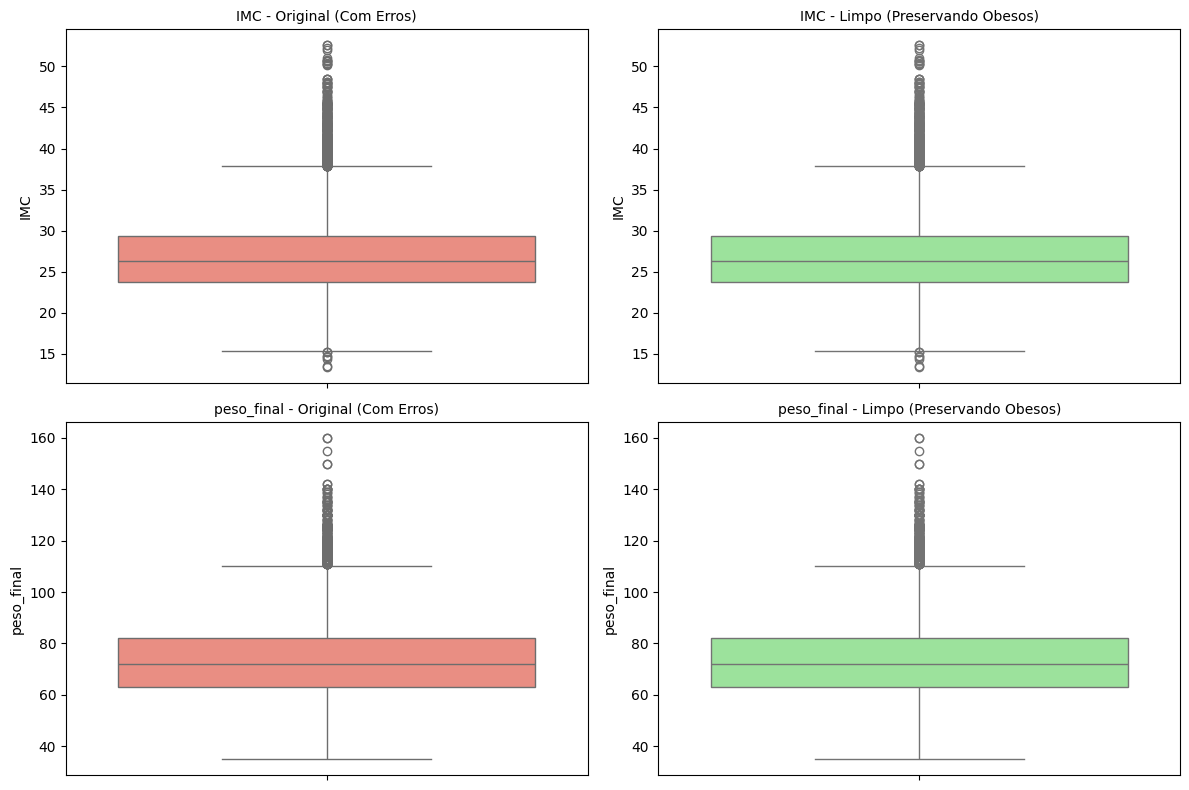

In [10]:
def plotar_comparacao(df_original, df_final, colunas):
    plt.figure(figsize=(12, 8))

    # Apenas para mostrar IMC e Peso (os mais críticos para Diabetes)
    cols_foco = ['IMC', 'peso_final']

    for i, col in enumerate(cols_foco):
        # Boxplot Original
        plt.subplot(2, 2, i*2 + 1)
        sns.boxplot(y=df_original[col], color='salmon')
        plt.title(f'{col} - Original (Com Erros)', fontsize=10)

        # Boxplot Limpo
        plt.subplot(2, 2, i*2 + 2)
        sns.boxplot(y=df_final[col], color='lightgreen')
        plt.title(f'{col} - Limpo (Preservando Obesos)', fontsize=10)

    plt.tight_layout()
    plt.show()

plotar_comparacao(df, df_limpo_biologico, cols_numericas)